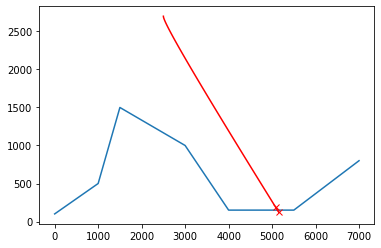

In [14]:
%matplotlib inline
x = [0, 1000, 1500, 3000, 4000, 5500, 6999]
y = [100, 500, 1500, 1000, 150, 150, 800]
# plt.plot(x,y,'',thread[:,0],thread[:,1],'r',thread[-2:,0],thread[-2:,1],'rx');  # 這行等於以下三行，三個 args 一組。
plt.plot(x,y,'')  # 地形
plt.plot(np.array(state.trace)[:,0],np.array(state.trace)[:,1],'r')  # 整條 trace 
plt.plot(np.array(state.trace)[-2:,0],np.array(state.trace)[-2:,1],'rx');  # 最後兩點打上標記


In [1]:
# path 太長好像 %run 不了，先到當地去 "subst g: . " 把整條 path 變成 x: 就好辦了
!subst x: /d
!subst x: "c:\Users\8304018\OneDrive\文件\Jupyter Notebooks\Differences of np.dot and np.multiply"
%run x:\How_to_check_if_two_line_segments_intersect.ipynb

In [2]:
# A Python3 program to find if 2 given line segments intersect or not

class Point:
	def __init__(self, x, y):
		self.x = x
		self.y = y

In [3]:
# Driver program to test above functions:
p1 = Point(1, 1)
q1 = Point(10, 1)
p2 = Point(1, 2)
q2 = Point(10, 2)

if doIntersect(p1, q1, p2, q2):
	print("Yes")
else:
	print("No")

p1 = Point(10, 0)
q1 = Point(0, 10)
p2 = Point(0, 0)
q2 = Point(10,10)

if doIntersect(p1, q1, p2, q2):
	print("Yes")
else:
	print("No")

p1 = Point(-5,-5)
q1 = Point(0, 0)
p2 = Point(1, 1)
q2 = Point(10, 10)

if doIntersect(p1, q1, p2, q2):
	print("Yes")
else:
	print("No")
	
# This code is contributed by Ansh Riyal

No
Yes
No


# 來到這裡，手動把 mars lander 的速度跟位置校正到符合標準

In [17]:
state_a = copy.deepcopy(state)
%f state_a --> # 這時候 vspeed -68 要調回 -40 以內； hspeed 74 要調回 20 以內

state_a --> [{'step': 73}, {'x': 5154}, {'y': 122}, {'hspeed': 74}, {'vspeed': -68}, {'fuel': 334}, {'angle': -20}, {'power': 3}, {'landed': 1}] (<class '__main__.State'>)
這時候 vspeed -68 要調回 -40 以內； hspeed 74 要調回 20 以內



In [18]:
# 水平位置可以了，不用罰
%f state_a :> x -->
%f land :> [4] Vector :> (*pop()).x  -->
%f land :> [5] Vector :> (*pop()).x  -->
state_a.x >= Vector(*land[4]).x and state_a.x <= Vector(*land[5]).x

state_a :> x --> 5153.858575022554 (<class 'numpy.float64'>)
land :> [4] Vector :> (*pop()).x  --> 4000 (<class 'int'>)
land :> [5] Vector :> (*pop()).x  --> 5500 (<class 'int'>)


True

In [19]:
# 還在空中嗎？因為觸地是整條 genome 的停止條件，故不必重複考慮。
%f state_a :> y -->
%f land :> [4] Vector :> (*pop()).y  -->
%f land :> [5] Vector :> (*pop()).y  -->
state_a.y >= Vector(*land[4]).y and state_a.y >= Vector(*land[5]).y

state_a :> y --> 121.93191925097857 (<class 'numpy.float64'>)
land :> [4] Vector :> (*pop()).y  --> 150 (<class 'int'>)
land :> [5] Vector :> (*pop()).y  --> 150 (<class 'int'>)


False

In [28]:
# 檢查 vspeed
%f state_a :> vspeed dup -->
%f VSpeed -->
%f abs VSpeed <= --> # 一定是全力往上噴火降回 -VSpeed 以下 (>= -40) 

state_a :> vspeed dup --> -67.90316070474064 (<class 'numpy.float64'>)
VSpeed --> 40 (<class 'int'>)
abs VSpeed <= --> False (<class 'numpy.bool_'>)
一定是全力往上噴火降回 -VSpeed 以下 (>= -40)



In [49]:
# 把垂直方向的 vspeed 修正到目標速度\
state_a = copy.deepcopy(state)
%f state_a -->
%f xdropall state_a :> fuel >x x@ --> 
while state_a.vspeed < -VSpeed:
    a = 0 - state_a.angle
    a = min(a,15) if a >= 0 else max(a,-15)
    state_a.next(a,1)
%f state_a -->
%f state_a :> vspeed -->
%f ( cost ) x> state_a :> fuel - >x x@ -->


state_a --> [{'step': 73}, {'x': 5154}, {'y': 122}, {'hspeed': 74}, {'vspeed': -68}, {'fuel': 334}, {'angle': -20}, {'power': 3}, {'landed': 1}] (<class '__main__.State'>)
xdropall state_a :> fuel >x x@ --> 334 (<class 'int'>)
state_a --> [{'step': 170}, {'x': 12345}, {'y': -5107}, {'hspeed': 74}, {'vspeed': -40}, {'fuel': -54}, {'angle': 0}, {'power': 4}, {'landed': 0}] (<class '__main__.State'>)
state_a :> vspeed --> -39.88538191237352 (<class 'numpy.float64'>)
( cost ) x> state_a :> fuel - >x x@ --> 388 (<class 'int'>)


In [29]:
# 檢查 hspeed
%f state_a :> hspeed dup -->
%f HSpeed -->
%f abs HSpeed <= --> # 往右太快要用 +90 度全力噴火減速

state_a :> hspeed dup --> 73.79314986012133 (<class 'numpy.float64'>)
HSpeed --> 20 (<class 'int'>)
abs HSpeed <= --> False (<class 'numpy.bool_'>)
往右太快要用 +90 度全力噴火減速



In [50]:
# 把水平方向的 hspeed 修正到目標速度。正向速度過快要用 +90 角全力噴火減速，或反之。
state_a = copy.deepcopy(state)
%f state_a -->
%f state_a :> fuel >x x@ --> 
while abs(state_a.hspeed) > HSpeed:
    # a = 90 - state_a.angle
    # a = min(a,15) if a >= 0 else max(a,-15)
    state_a.next(15,1)
%f state_a -->
%f state_a :> hspeed -->
%f ( cost ) x> state_a :> fuel - dup -->
%f ( total cost ) x> + -->


state_a --> [{'step': 73}, {'x': 5154}, {'y': 122}, {'hspeed': 74}, {'vspeed': -68}, {'fuel': 334}, {'angle': -20}, {'power': 3}, {'landed': 1}] (<class '__main__.State'>)
state_a :> fuel >x x@ --> 334 (<class 'int'>)
state_a --> [{'step': 90}, {'x': 6018}, {'y': -1300}, {'hspeed': 18}, {'vspeed': -112}, {'fuel': 266}, {'angle': 90}, {'power': 4}, {'landed': 0}] (<class '__main__.State'>)
state_a :> hspeed --> 18.16539918206871 (<class 'numpy.float64'>)
( cost ) x> state_a :> fuel - dup --> 68 (<class 'int'>)
( total cost ) x> + --> 456 (<class 'int'>)


# 算算看墜毀前一步的 cost 

In [60]:
state = State(**state0.__dict__)
%f state :: next(-15,1) state :: next(-5,1) state :: next(0,1)
for i in range(69):
    state.next(0,0)
    if state.landed: 
        break       
%f state -->
        

state --> [{'step': 72}, {'x': 5081}, {'y': 189}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 337}, {'angle': -20}, {'power': 3}, {'landed': 0}] (<class '__main__.State'>)


In [61]:
state_a = copy.deepcopy(state)
%f state_a --> # 這時候 vspeed -68 要調回 -40 以內； hspeed 74 要調回 20 以內

state_a --> [{'step': 72}, {'x': 5081}, {'y': 189}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 337}, {'angle': -20}, {'power': 3}, {'landed': 0}] (<class '__main__.State'>)
這時候 vspeed -68 要調回 -40 以內； hspeed 74 要調回 20 以內



In [62]:
# 水平位置可以了，不用罰
%f state_a :> x -->
%f land :> [4] Vector :> (*pop()).x  -->
%f land :> [5] Vector :> (*pop()).x  -->
state_a.x >= Vector(*land[4]).x and state_a.x <= Vector(*land[5]).x

state_a :> x --> 5080.578455377421 (<class 'numpy.float64'>)
land :> [4] Vector :> (*pop()).x  --> 4000 (<class 'int'>)
land :> [5] Vector :> (*pop()).x  --> 5500 (<class 'int'>)


True

In [63]:
# 檢查 vspeed
%f state_a :> vspeed dup -->
%f VSpeed -->
%f abs VSpeed <= --> # 一定是全力往上噴火降回 -VSpeed 以下 (>= -40) 

state_a :> vspeed dup --> -67.01123856709837 (<class 'numpy.float64'>)
VSpeed --> 40 (<class 'int'>)
abs VSpeed <= --> False (<class 'numpy.bool_'>)
一定是全力往上噴火降回 -VSpeed 以下 (>= -40)



In [64]:
# 把垂直方向的 vspeed 修正到目標速度\
state_a = copy.deepcopy(state)
%f state_a -->
%f xdropall state_a :> fuel >x x@ --> 
while state_a.vspeed < -VSpeed:
    a = 0 - state_a.angle
    a = min(a,15) if a >= 0 else max(a,-15)
    state_a.next(a,1)
%f state_a -->
%f state_a :> vspeed -->
%f ( cost ) x> state_a :> fuel - >x x@ -->


state_a --> [{'step': 72}, {'x': 5081}, {'y': 189}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 337}, {'angle': -20}, {'power': 3}, {'landed': 0}] (<class '__main__.State'>)
xdropall state_a :> fuel >x x@ --> 337 (<class 'int'>)
state_a --> [{'step': 166}, {'x': 11953}, {'y': -4834}, {'hspeed': 73}, {'vspeed': -40}, {'fuel': -39}, {'angle': 0}, {'power': 4}, {'landed': 0}] (<class '__main__.State'>)
state_a :> vspeed --> -39.860459774731254 (<class 'numpy.float64'>)
( cost ) x> state_a :> fuel - >x x@ --> 376 (<class 'int'>)


In [65]:
# 檢查 hspeed
%f state_a :> hspeed dup -->
%f HSpeed -->
%f abs HSpeed <= --> # 往右太快要用 +90 度全力噴火減速

state_a :> hspeed dup --> 73.11571240113496 (<class 'numpy.float64'>)
HSpeed --> 20 (<class 'int'>)
abs HSpeed <= --> False (<class 'numpy.bool_'>)
往右太快要用 +90 度全力噴火減速



In [66]:
# 把水平方向的 hspeed 修正到目標速度。正向速度過快要用 +90 角全力噴火減速，或反之。
state_a = copy.deepcopy(state)
%f state_a -->
%f state_a :> fuel >x x@ --> 
while abs(state_a.hspeed) > HSpeed:
    # a = 90 - state_a.angle
    # a = min(a,15) if a >= 0 else max(a,-15)
    state_a.next(15,1)
%f state_a -->
%f state_a :> hspeed -->
%f ( cost ) x> state_a :> fuel - dup -->
%f ( total cost ) x> + -->


state_a --> [{'step': 72}, {'x': 5081}, {'y': 189}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 337}, {'angle': -20}, {'power': 3}, {'landed': 0}] (<class '__main__.State'>)
state_a :> fuel >x x@ --> 337 (<class 'int'>)
state_a --> [{'step': 89}, {'x': 5927}, {'y': -1217}, {'hspeed': 17}, {'vspeed': -111}, {'fuel': 269}, {'angle': 90}, {'power': 4}, {'landed': 0}] (<class '__main__.State'>)
state_a :> hspeed --> 17.139338752091703 (<class 'numpy.float64'>)
( cost ) x> state_a :> fuel - dup --> 68 (<class 'int'>)
( total cost ) x> + --> 444 (<class 'int'>)


# 算算看墜毀前一步煞車的 cost
臨時煞車對 round-off 取整數後的 hspeed vspeed 乍看沒有影響，其實 cost 還是有差，這表示 cost 算法好！

In [75]:
state = State(**state0.__dict__)
%f state :: next(-15,1) state :: next(-5,1) state :: next(0,1)
for i in range(69):
    state.next(0,0)
%f ( 還在空中 ) state -->
state.next(15,1)
%f ( 墜毀了 ) state -->
        

( 還在空中 ) state --> [{'step': 72}, {'x': 5081}, {'y': 189}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 337}, {'angle': -20}, {'power': 3}, {'landed': 0}] (<class '__main__.State'>)
( 墜毀了 ) state --> [{'step': 73}, {'x': 5154}, {'y': 123}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 333}, {'angle': -5}, {'power': 4}, {'landed': 1}] (<class '__main__.State'>)


In [68]:
state_a = copy.deepcopy(state)
%f state_a --> # 這時候 vspeed -68 要調回 -40 以內； hspeed 74 要調回 20 以內

state_a --> [{'step': 73}, {'x': 5154}, {'y': 123}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 333}, {'angle': -5}, {'power': 4}, {'landed': 1}] (<class '__main__.State'>)
這時候 vspeed -68 要調回 -40 以內； hspeed 74 要調回 20 以內



In [69]:
# 水平位置可以了，不用罰
%f state_a :> x -->
%f land :> [4] Vector :> (*pop()).x  -->
%f land :> [5] Vector :> (*pop()).x  -->
state_a.x >= Vector(*land[4]).x and state_a.x <= Vector(*land[5]).x

state_a :> x --> 5153.519856293061 (<class 'numpy.float64'>)
land :> [4] Vector :> (*pop()).x  --> 4000 (<class 'int'>)
land :> [5] Vector :> (*pop()).x  --> 5500 (<class 'int'>)


True

In [70]:
# 檢查 vspeed
%f state_a :> vspeed dup -->
%f VSpeed -->
%f abs VSpeed <= --> # 一定是全力往上噴火降回 -VSpeed 以下 (>= -40) 

state_a :> vspeed dup --> -66.73745977473139 (<class 'numpy.float64'>)
VSpeed --> 40 (<class 'int'>)
abs VSpeed <= --> False (<class 'numpy.bool_'>)
一定是全力往上噴火降回 -VSpeed 以下 (>= -40)



In [71]:
# 把垂直方向的 vspeed 修正到目標速度
state_a = copy.deepcopy(state)
%f state_a -->
%f xdropall state_a :> fuel >x x@ --> 
while state_a.vspeed < -VSpeed:
    a = 0 - state_a.angle
    a = min(a,15) if a >= 0 else max(a,-15)
    state_a.next(a,1)
%f state_a -->
%f state_a :> vspeed -->
%f ( cost ) x> state_a :> fuel - >x x@ -->


state_a --> [{'step': 73}, {'x': 5154}, {'y': 123}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 333}, {'angle': -5}, {'power': 4}, {'landed': 1}] (<class '__main__.State'>)
xdropall state_a :> fuel >x x@ --> 333 (<class 'int'>)
state_a --> [{'step': 166}, {'x': 11953}, {'y': -4834}, {'hspeed': 73}, {'vspeed': -40}, {'fuel': -39}, {'angle': 0}, {'power': 4}, {'landed': 0}] (<class '__main__.State'>)
state_a :> vspeed --> -39.860459774731254 (<class 'numpy.float64'>)
( cost ) x> state_a :> fuel - >x x@ --> 372 (<class 'int'>)


In [72]:
# 檢查 hspeed
%f state_a :> hspeed dup -->
%f HSpeed -->
%f abs HSpeed <= --> # 往右太快要用 +90 度全力噴火減速

state_a :> hspeed dup --> 73.11571240113496 (<class 'numpy.float64'>)
HSpeed --> 20 (<class 'int'>)
abs HSpeed <= --> False (<class 'numpy.bool_'>)
往右太快要用 +90 度全力噴火減速



In [73]:
# 把水平方向的 hspeed 修正到目標速度。正向速度過快要用 +90 角全力噴火減速，或反之。
state_a = copy.deepcopy(state)
%f state_a -->
%f state_a :> fuel >x x@ --> 
while abs(state_a.hspeed) > HSpeed:
    # a = 90 - state_a.angle
    # a = min(a,15) if a >= 0 else max(a,-15)
    state_a.next(15,1)
%f state_a -->
%f state_a :> hspeed -->
%f ( cost ) x> state_a :> fuel - dup -->
%f ( total cost ) x> + -->


state_a --> [{'step': 73}, {'x': 5154}, {'y': 123}, {'hspeed': 73}, {'vspeed': -67}, {'fuel': 333}, {'angle': -5}, {'power': 4}, {'landed': 1}] (<class '__main__.State'>)
state_a :> fuel >x x@ --> 333 (<class 'int'>)
state_a --> [{'step': 89}, {'x': 5927}, {'y': -1217}, {'hspeed': 17}, {'vspeed': -111}, {'fuel': 269}, {'angle': 90}, {'power': 4}, {'landed': 0}] (<class '__main__.State'>)
state_a :> hspeed --> 17.139338752091703 (<class 'numpy.float64'>)
( cost ) x> state_a :> fuel - dup --> 64 (<class 'int'>)
( total cost ) x> + --> 436 (<class 'int'>)


In [ ]:
a = [1,2,3]


In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


In [8]:
# 模擬試跑 genome. Genome 可能太長或不夠，傳回訂正好的 genome 以及最後 state  
def simulate_of_genome(input_genome: GENOME) -> Tuple[GENOME,STATE]:
    genome = copy.deepcopy(input_genome)  # make a copy to isolate the original
    state = State(**state0.__dict__)  # init state for simulation
    # 照 genome 跑到觸地、飛走、或油料耗盡時為止， genome 可能含有無效的長度要 cut 掉以免浪費時間嘗試。
    for i in range(len(genome)): 
        state.next(*genome[i])  # run 1 step 
        if round(state.y,0) < Altitude or state.y > 3000 or state.fuel <= 0:  # 這高度、油料不能再繼續了
            genome = genome[:i+1]  # 太長的尾巴切掉
            break
        
    # 接續以上跑完 input genome 之後的 state 看看 input genome 是否太短需要補綴 genes 讓 lander 觸地。
    while round(state.y,0) >= Altitude and state.y <= 3000 and state.fuel > 0:
        genome.append(genome[-1][:])  # 注意！若不用 [:] slice copy 則 append 進去的都是同一個。gene 是個 shallow array 無誤，可以用 slice copy.        
        state.next(*genome[-1])  # 簡單照抄最後一 step
        
    return genome,state  # 這個 return genome 是 input genome 的訂正版

# 很妙，這產生「自由落體」的 genome 與最後 state 
genome, last_state = simulate_of_genome([[0,0]])
%f cr ( 「自由落體」 ) genome -->
%f last_state -->
%f last_state cost_of_state :> (pop()) -->
    
# 而這產生「全速飛走」的 genome 與最後 state 
genome, last_state = simulate_of_genome([[0,1]])
%f cr ( 「全速飛走」 ) genome -->
%f last_state -->
%f last_state cost_of_state :> (pop()) --> cr


cr ( 「自由落體」 ) genome --> [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]] (<class 'list'>)
last_state --> {'step': 36, 'x': 0, 'y': 95.2720000000003, 'hspeed': 0, 'vspeed': -133.59599999999998, 'fuel': 500, 'angle': 0, 'power': 0, 'force': -3.711} (<class '__main__.State'>)
last_state cost_of_state :> (pop()) --> 1366 (<class 'int'>)

cr ( 「全速飛走」 ) genome --> [[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 

In [9]:
# fitness function 
# https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)   _*_
verbose = False 
def sa(initial: GENOME) -> Tuple[GENOME,int,int] :
    current = copy.deepcopy(initial)  # 咱 deep 不能用 [:]
    current, current_last_state = simulate_of_genome(current)
    current_cost = cost_of_state(current_last_state)
    
    temp = 17.0  # (1/50)*(2*fuel0)  # <---- [ ] Hyperparameter, 來自 Einstein's problem 的心得，取總分的 1/15 
    num_iterations = 0

    for i in range(1000):  # 若想安全降落為止，可能不如有限次數換個 epoch 試試運氣
        neighbour = get_random_neighbour(current)
        neighbour, neighbour_last_state = simulate_of_genome(neighbour)
        neighbour_cost = cost_of_state(neighbour_last_state)
        
        cost_delta = neighbour_cost - current_cost
        if cost_delta < 0:  # neighbour 較好，都接受。
            current, current_cost, current_last_state = neighbour, neighbour_cost, neighbour_last_state
            if verbose: print({"cost":current_cost, "delta":cost_delta, "temperature":round(temp,2), "exp": "n/a"})
        elif cost_delta >= 0:  # 雖然 neighbour 不好，也偶而接受。
            exp = math.exp(-cost_delta/temp) 
            if random.random() < exp:
                current, current_cost, current_last_state = neighbour, neighbour_cost, neighbour_last_state
                if verbose: print({"cost":current_cost, "delta":cost_delta, "temperature":round(temp,2), "exp": round(exp,2)})
        else:  # 排除相等的狀況，不要浪費時間、debug 版面 <-- 錯！成績相等時 genome 不一定相等。
               # 「相同」應該從 get_random_neighbour() 著手徹底排除。          
            assert False, 'Impossible case' 

        num_iterations += 1
        # if num_iterations % 10 == 0 and temp > 0.1:  # <---- [ ] Hyperparameter
        #     temp -= 0.1  # <---- [ ] Hyperparameter
        if abs(round(current_last_state.vspeed,0)) <= VSpeed and round(current_last_state.y,0) < Altitude:
            temp = max(temp - 0.1,0) # 根據觀察 log 決定設計成約數十次到一百次之內降到零度
            if verbose: print('B i n g o ! iterations:{} temperature:{} curent_cost:{}'.format(num_iterations, round(temp,3), current_cost))
            if temp <= 0.01: break
        
    return current, num_iterations, current_cost, current_last_state

In [10]:
def epoch(initial: GENOME=None):

    genome: GENOME = [];
    
    # 有指定就用指定的，否則就用亂數產生一組啟始 genome
    # random.seed(100)
    if initial:  
        genome = copy.deepcopy(initial); 
    else:  
        for i in range(random.randint(1,100)): # 沒看過 genome 長度超過 100 的，多了無所謂會被自動切掉。
            genome.append([0,random.randint(-1, 1)]) 

    genome, iterations, cost, state = sa(genome)

    return (genome, iterations, cost, state)

In [11]:
%f [] constant history 

if __name__ == "__main__":
    best = epoch([[0,0]])  # (genome, iterations, cost, state)
    for i in range(100):
        result = epoch(best[0])  # (genome, iterations, cost, state)
        if result[2] < best[2]:
            best = result
        if i % 20 == 0 :
            print('Epoch {} best cost {}'.format(i,best[2]))
        %f best history :: append(pop())
    print('Epoch {} best cost {}'.format(i,best[2]))
    print('Done!')


Epoch 0 best cost 231
Epoch 20 best cost 186
Epoch 40 best cost 175
Epoch 60 best cost 175
Epoch 80 best cost 175
Epoch 99 best cost 175
Done!


In [ ]:
# 取 best result 的絕對 genome 去 web site 跑跑看， 500 - 最佳 cost 175 = 325 與結果一致無誤。  
%f best :> [0] genome_to_command_list :> (pop()) --> 

In [ ]:
%%f
\ 這個實驗看來成績 cost 相同的 genome 都一樣！
history ( genome, iterations, cost, state ) <py>
    history = pop()
    distribution = {}
    for i in history:
        try:
            distribution[i[2]] += 1
        except:
            distribution.update({i[2]: 1})
    print(distribution)
    assert False
    print('220','-'*30)
    for i in history:
        if i[2] == 220:
            print(i[0])
    print('221','-'*30)
    for i in history:
        if i[2] == 201:
            print(i[0])
    print('198','-'*30)
    for i in history:
        if i[2] == 198:
            print(i[0])
    print('187','-'*30)
    for i in history:
        if i[2] == 187:
            print(i[0])
    print('186','-'*30)
    for i in history:
        if i[2] == 186:
            print(i[0])
    print('183','-'*30)
    for i in history:
        if i[2] == 183:
            print(i[0])
</py> 
